## SLF comparison
For taking model output, processing, and comparing with the standard values from an unmodified NorESM run, and the standard observations as well.

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    polyfit, ccrs, LinearRegression, metrics
    )

from functions import (
    masked_average, interpretNS, plot_slf_isotherms, 
    add_weights, process_caliop, process_for_slf,
    noresm_slf_to_df, regress_1d
    )

from classes import CT_SLF_Metric

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'mnth15runs/'   # inconsistent label compared to jupy_test
mods_dir = 'inp_validation/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(mods_dir) and os.path.exists(output_dir) and os.path.exists(mods_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


Get standard 15-month run with cloudtop output.

In [4]:
files = os.listdir(case_dir)
files.sort()
files

['.ipynb_checkpoints',
 '20191122_161009_sampleparamset_wbf_1_inp_1',
 '20191127_162007_sampleparamset_wbf_0.01_inp_1',
 '20191128_171713_sampleparamset_wbf_10_inp_1',
 '20191128_171713_sampleparamset_wbf_1_inp_10',
 '20191209_180424_sampleparamset_wbf_1_inp_0.1',
 '20191210_152149_sampleparamset_wbf_1_inp_0.1',
 '20191210_152149_sampleparamset_wbf_1_inp_10',
 '20191217_134307_singleparam_jolt_wbf_1_inp_0',
 '20191217_145440_singleparam_jolt_wbf_1_inp_1000',
 '20191219_151155_singleparam_cttest_wbf_1_inp_1.cam.h0.0001-01',
 '20191230_130025_singleparam_cttest15_wbf_1_inp_1',
 '20200109_1541_wbf_1.0_inp_1.0',
 '20200110_142006_singleparam_nudge_wbf_1_inp_1000',
 '20200112_002538_singleparam_nudge_wbf_1_inp_0',
 '20200116_130416_nudged_wbfmods_wbf_0.01_inp_1',
 '20200116_130416_nudged_wbfmods_wbf_10_inp_1',
 '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100',
 '20200204_113441_singleparam_inpcheck_wbf_1_inp_10',
 '20200204_120214_singleparam_wbfcheck_wbf_0.1_inp_1',
 '20200218_1726

In [26]:
cam_arctic2 = CT_SLF_Metric(case_dir)
cam_arctic2.add_case('20200319_132512_singleparam_cam61arctic2m15_wbf_1_inp_1')
cam_arctic2.add_case('20200218_172625_singleparam_cam61_wbf_1_inp_1')
cam_arctic2.add_case('20200109_1541_wbf_1.0_inp_1.0')
cam_arctic2.add_case('20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100')
cam_arctic2.add_case('20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100')
cam_arctic2.add_case('20200116_130416_nudged_wbfmods_wbf_0.01_inp_1')


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


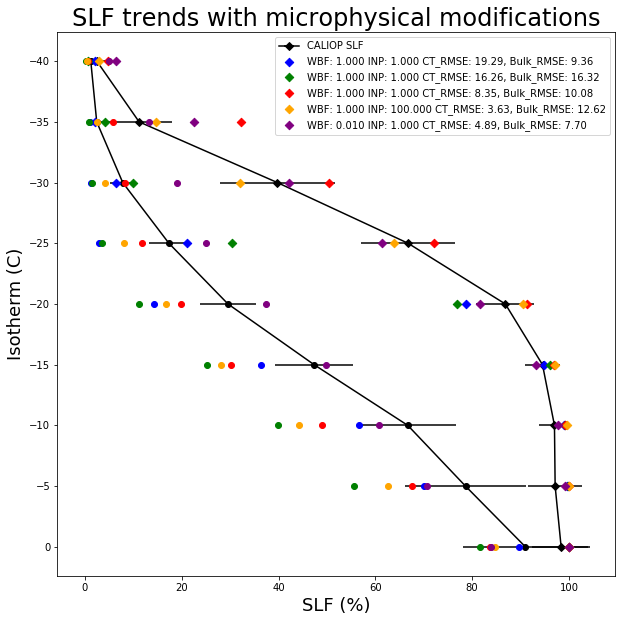

In [27]:
test = cam_arctic2.plot_isos_all()

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


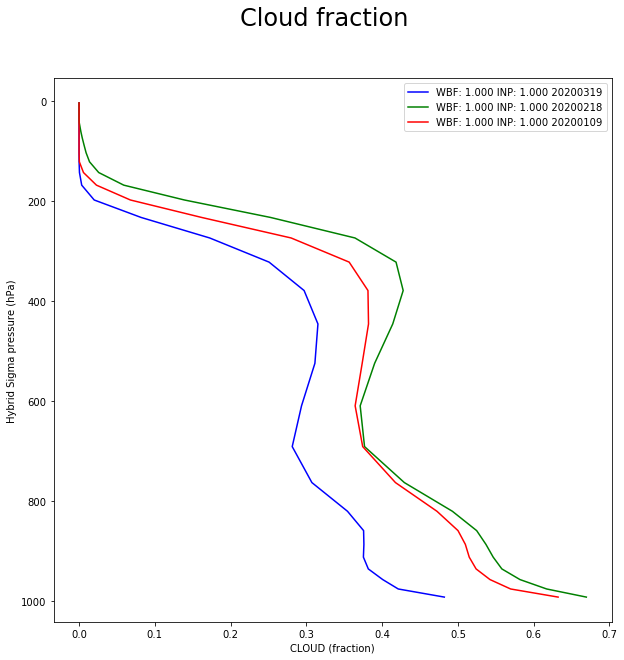

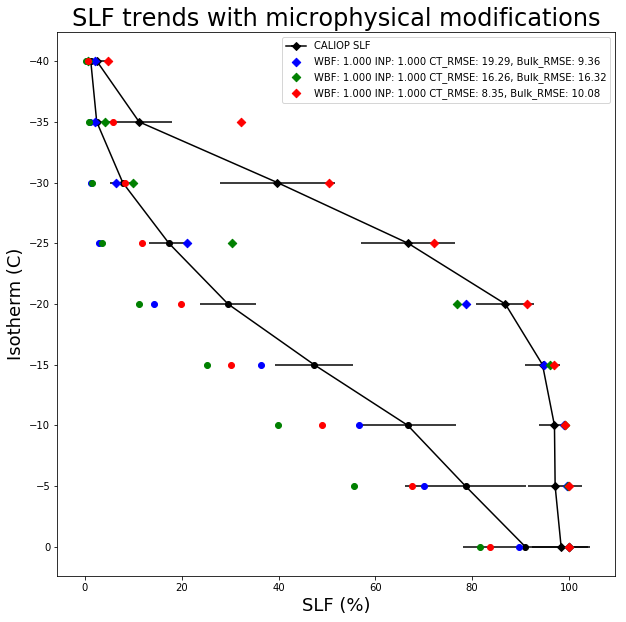

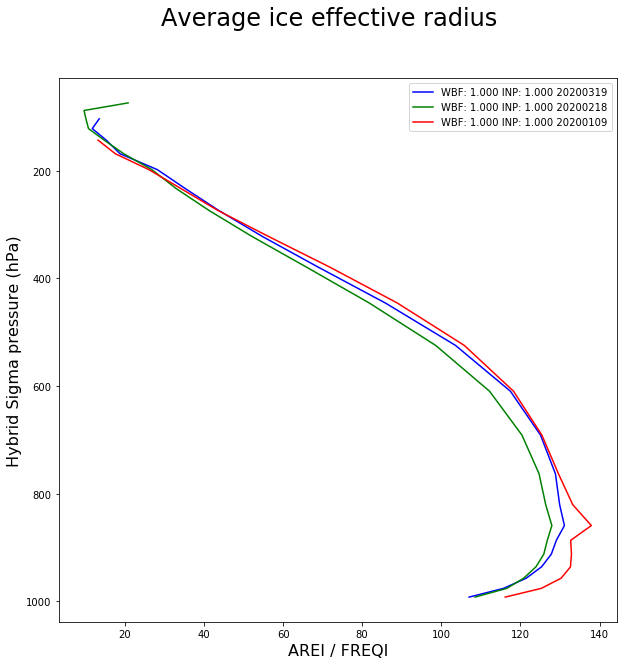

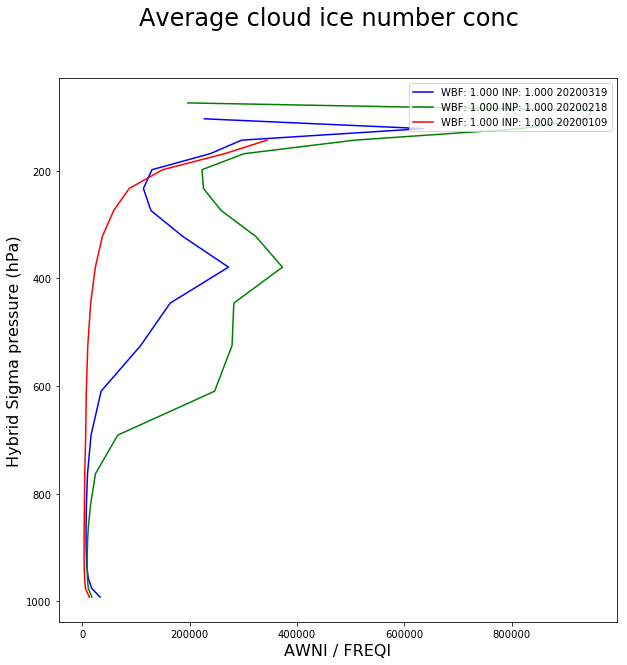

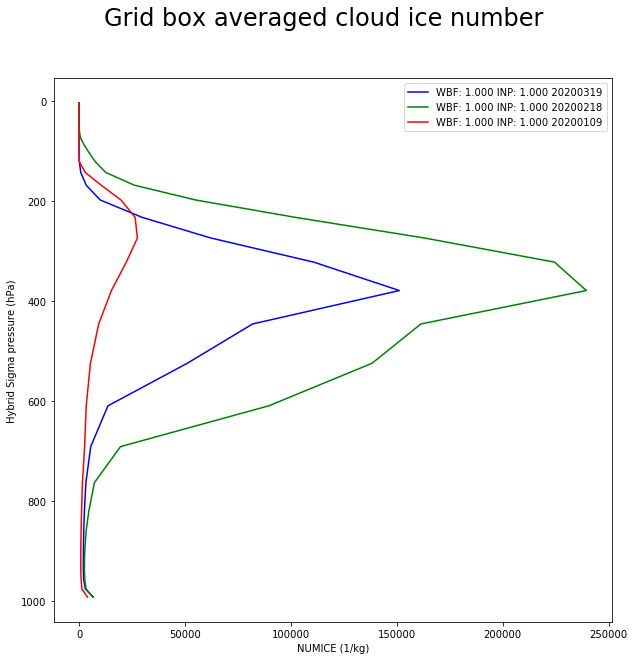

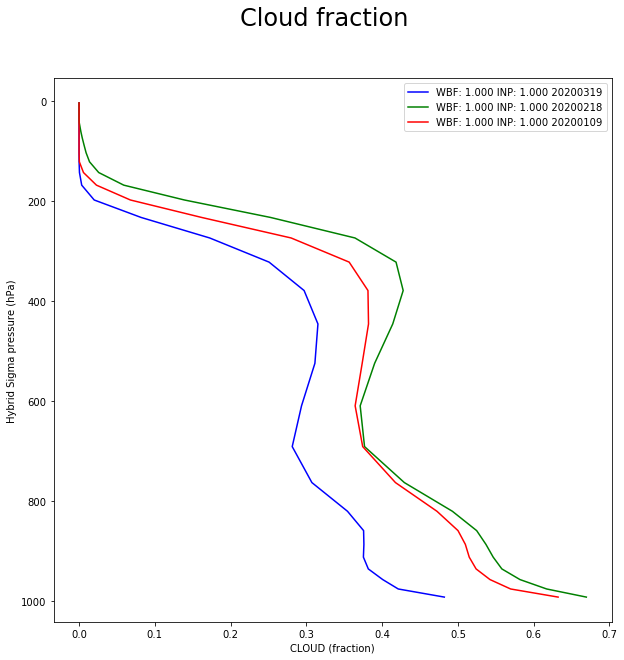

In [21]:
cam_arctic2.plot_var_ratio('AREI','FREQI')
cam_arctic2.plot_var_ratio('AWNI','FREQI')
cam_arctic2.plot_single_var('NUMICE')
cam_arctic2.plot_single_var('CLOUD')

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


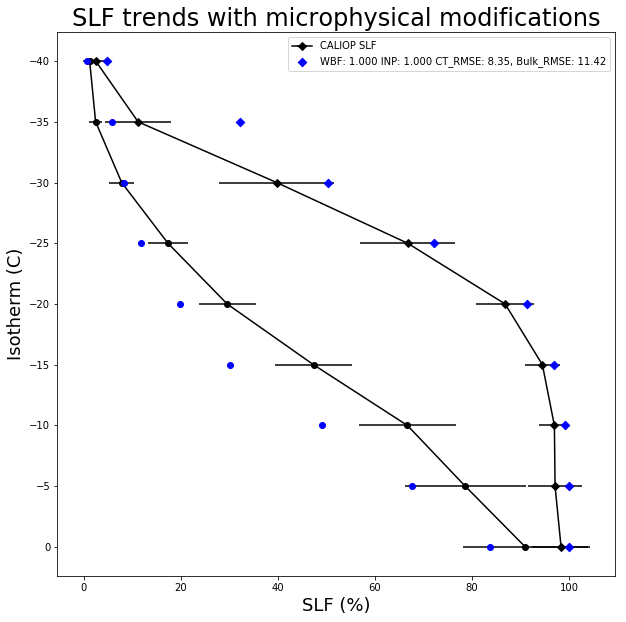

In [6]:
_tt = cam_only.plot_isos_all()

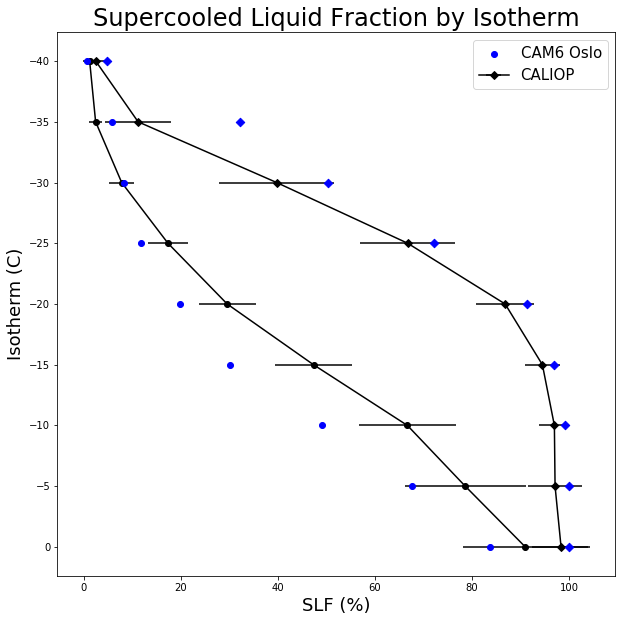

In [8]:
_ax = _tt.get_axes()[0]
_ax.set_title('Supercooled Liquid Fraction by Isotherm', fontsize=24)
_handles, _labels = _ax.get_legend_handles_labels()
new_hands = _handles[1::2] # pick every other handle object (since they're paired)
new_labs = ['CAM6 Oslo', 'CALIOP']
_ax.legend(new_hands, new_labs, fontsize=15)
_tt

In [9]:
filename = '%s/cam6oslo_basestate.png' % (output_dir)

_tt.savefig(filename,format = 'png', dpi = 200)
_tt.clf()

In [79]:
cam61_inps = CT_SLF_Metric(mods_dir, sel_month=2)

#cam6 = '20200109_1541_wbf_1.0_inp_1.0'
cam61_inp100x = '20200218_112948_singleparam_nimaxmpconly_wbf_1_inp_100'
cam61 = '20200218_112948_singleparam_nimaxmpconly_wbf_1_inp_1'

#cam61_comp.add_case(cam6)
cam61_inps.add_case(cam61)
cam61_inps.add_case(cam61_inp100x, path=mods_dir)

Loading abridged dataset "slfvars" for 20200218_112948_singleparam_nimaxmpconly_wbf_1_inp_1.
Loading abridged dataset "slfvars" for 20200218_112948_singleparam_nimaxmpconly_wbf_1_inp_100.


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


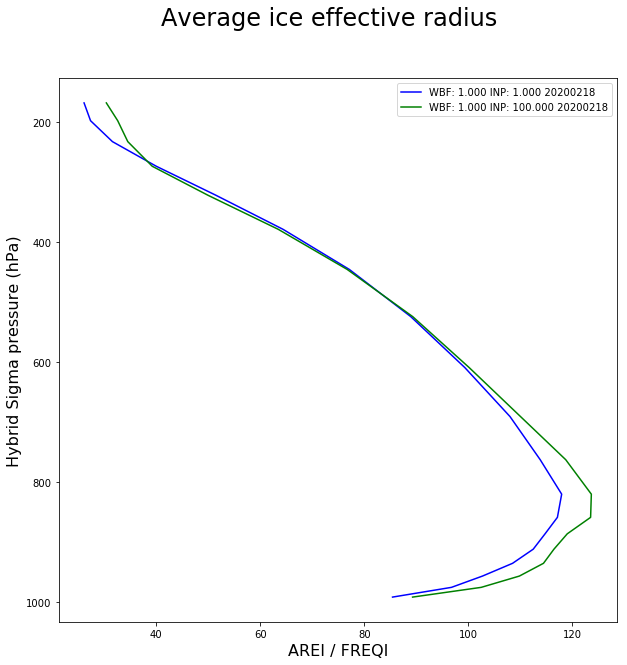

In [80]:
_sizeplt = cam61_inps.plot_var_ratio('AREI','FREQI')

In [81]:
os.listdir(case_dir)

['20200219_120417_singleparam_cam61_wbf_0.1_inp_1',
 '20200112_002538_singleparam_nudge_wbf_1_inp_0',
 '20200116_130416_nudged_wbfmods_wbf_10_inp_1',
 '20191230_130025_singleparam_cttest15_wbf_1_inp_1',
 '20191217_145440_singleparam_jolt_wbf_1_inp_1000',
 '20200110_142006_singleparam_nudge_wbf_1_inp_1000',
 '20191128_171713_sampleparamset_wbf_10_inp_1',
 '20200225_182100_singleparam_cam61_wbf_0.01_inp_0.01',
 '20191209_180424_sampleparamset_wbf_1_inp_0.1',
 'error_vs_iso.png',
 '.ipynb_checkpoints',
 '20200219_120417_singleparam_cam61_wbf_1_inp_0.1',
 '20200220_105217_singleparam_cam61_wbf_0.01_inp_1',
 '20200218_172625_singleparam_cam61_wbf_1_inp_1',
 'unused',
 '20191127_162007_sampleparamset_wbf_0.01_inp_1',
 'runs_as_vectors.png',
 '20191210_152149_sampleparamset_wbf_1_inp_0.1',
 '20200220_105217_singleparam_cam61_wbf_1_inp_0.01',
 '20200109_1541_wbf_1.0_inp_1.0',
 '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100',
 '20191128_171713_sampleparamset_wbf_1_inp_10',
 '20200204_1

In [46]:
cam61_1pct = CT_SLF_Metric(case_dir)

cam61 = '20200218_172625_singleparam_cam61_wbf_1_inp_1'
cam61_inp1pct = '20200220_105217_singleparam_cam61_wbf_1_inp_0.01'
cam61_wbf1pct = '20200220_105217_singleparam_cam61_wbf_0.01_inp_1'

#cam61_comp.add_case(cam6)
cam61_1pct.add_case(cam61)
cam61_1pct.add_case(cam61_wbf1pct)
cam61_1pct.add_case(cam61_inp1pct)

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [85]:
cam61_new = CT_SLF_Metric(case_dir)

cam61 = '20200218_172625_singleparam_cam61_wbf_1_inp_1'
cam61_wbf10pct = '20200219_120417_singleparam_cam61_wbf_0.1_inp_1'
cam61_inp10pct = '20200219_120417_singleparam_cam61_wbf_1_inp_0.1'
cam61_inp1pct = '20200220_105217_singleparam_cam61_wbf_1_inp_0.01'
cam61_wbf1pct = '20200220_105217_singleparam_cam61_wbf_0.01_inp_1'
wbf1_inp1 = '20200225_182100_singleparam_cam61_wbf_0.01_inp_0.01'
wbf10_inp10 = '20200225_182100_singleparam_cam61_wbf_0.1_inp_0.1'

cam61_new.add_case(cam61) # make list optional arg
cam61_new.add_case(wbf1_inp1)
cam61_new.add_case(wbf10_inp10)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


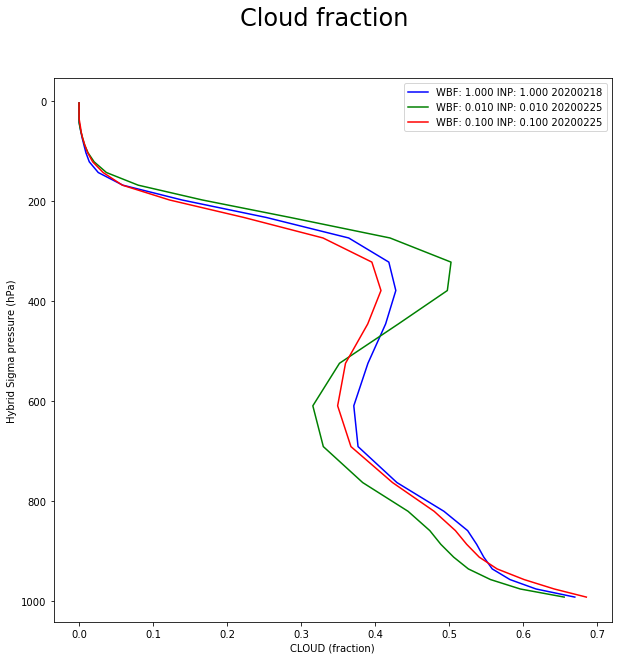

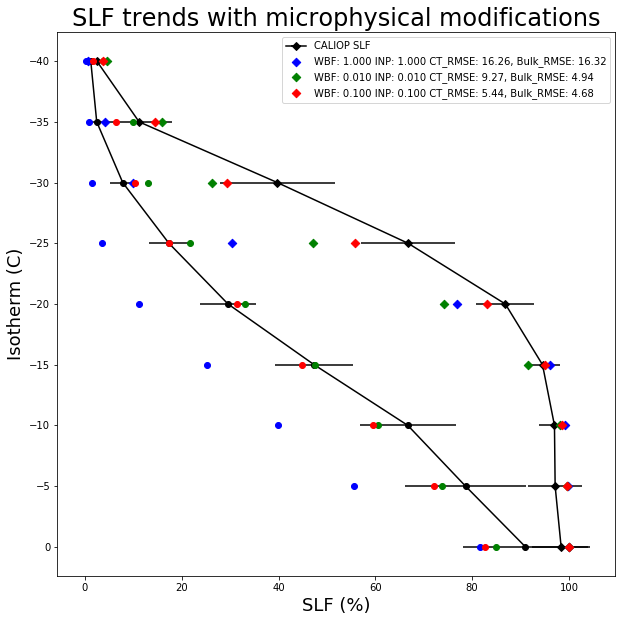

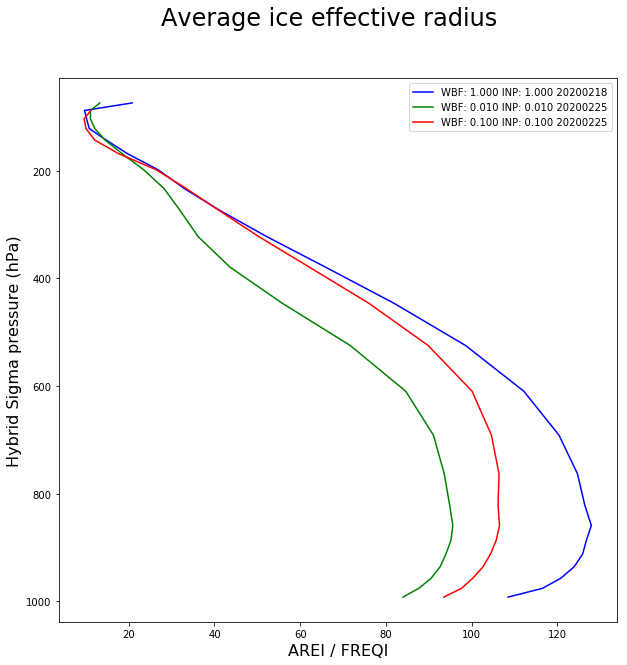

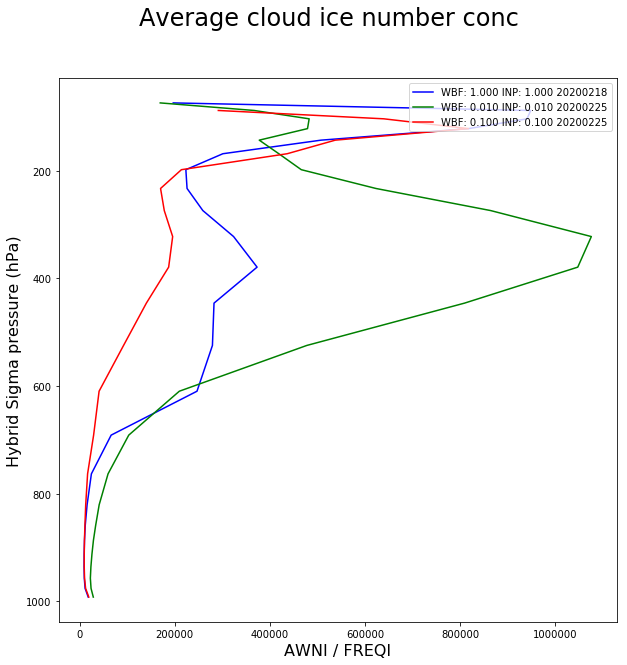

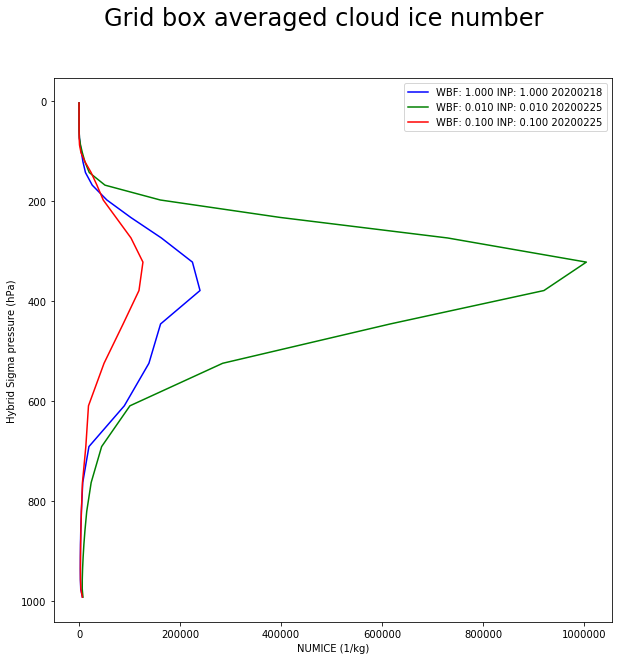

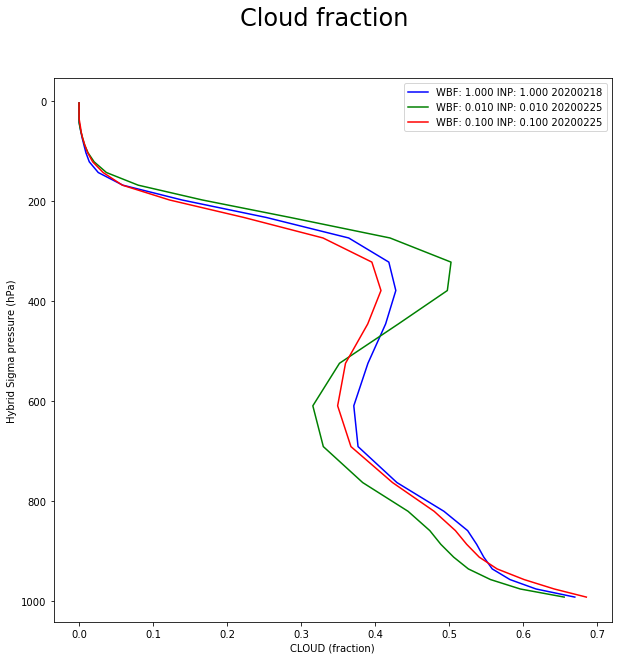

In [89]:
cam61_new.plot_isos_all()
cam61_new.plot_var_ratio('AREI','FREQI')
cam61_new.plot_var_ratio('AWNI','FREQI')
cam61_new.plot_single_var('NUMICE')
cam61_new.plot_single_var('CLOUD')

In [82]:
cam61_all = CT_SLF_Metric(case_dir) # All runs with CAM61
cam61_inp = CT_SLF_Metric(case_dir) # Runs with INP mods
cam61_wbf = CT_SLF_Metric(case_dir) # Runs with WBF mods

#cam6 = '20200109_1541_wbf_1.0_inp_1.0'
cam61 = '20200218_172625_singleparam_cam61_wbf_1_inp_1'
cam61_wbf10pct = '20200219_120417_singleparam_cam61_wbf_0.1_inp_1'
cam61_inp10pct = '20200219_120417_singleparam_cam61_wbf_1_inp_0.1'
cam61_inp1pct = '20200220_105217_singleparam_cam61_wbf_1_inp_0.01'
cam61_wbf1pct = '20200220_105217_singleparam_cam61_wbf_0.01_inp_1'
wbf1_inp1 = '20200225_182100_singleparam_cam61_wbf_0.01_inp_0.01'
wbf10_inp10 = '20200225_182100_singleparam_cam61_wbf_0.1_inp_0.1'

#cam61_comp.add_case(cam6)
cam61_all.add_case(cam61)
cam61_inp.add_case(cam61)
cam61_wbf.add_case(cam61)
cam61_all.add_case(cam61_wbf10pct)
cam61_all.add_case(cam61_wbf1pct)
cam61_wbf.add_case(cam61_wbf10pct)
cam61_wbf.add_case(cam61_wbf1pct)
cam61_all.add_case(cam61_inp10pct)
cam61_all.add_case(cam61_inp1pct)
cam61_inp.add_case(cam61_inp10pct)
cam61_inp.add_case(cam61_inp1pct)
cam61_all.add_case(wbf1_inp1)
cam61_all.add_case(wbf10_inp10)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  re

-13.617718767834013 -8.549459765964896
-3.9136192159781285 -8.258586760446622
-4.081841503891115 -14.77404429459975
-11.386854605664691 -2.529888566589667
-11.801092357489544 -0.8775116227006473
0.6586128960226227 -4.069208975635463
-1.75407851813523 -1.6004736435612839


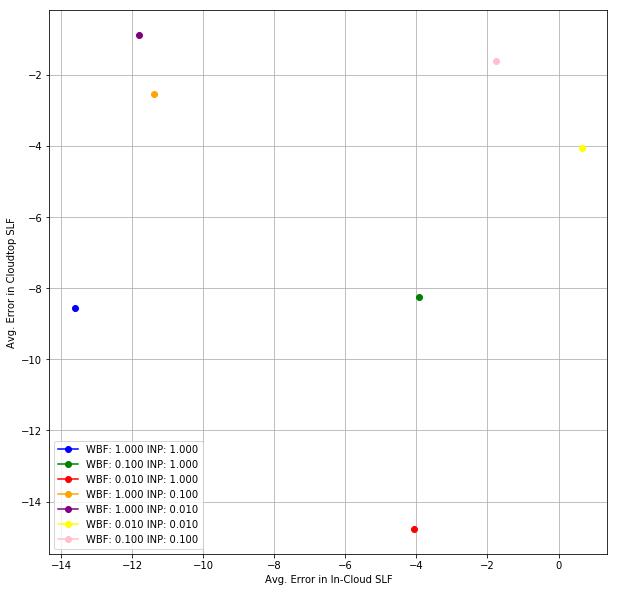

In [83]:
cam61_all.dual_parameterspace()

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


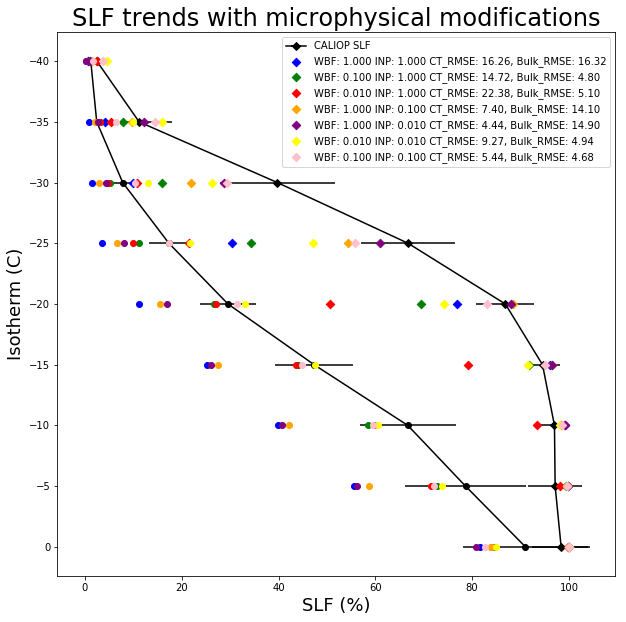

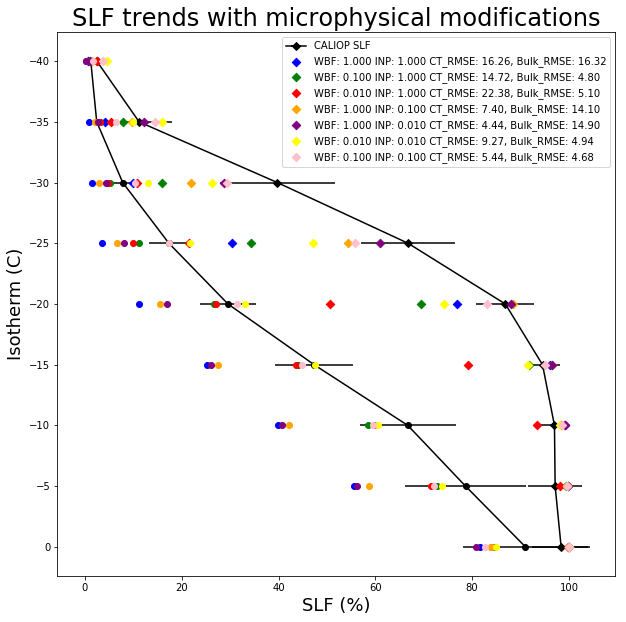

In [84]:
cam61_all.plot_isos_all()

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


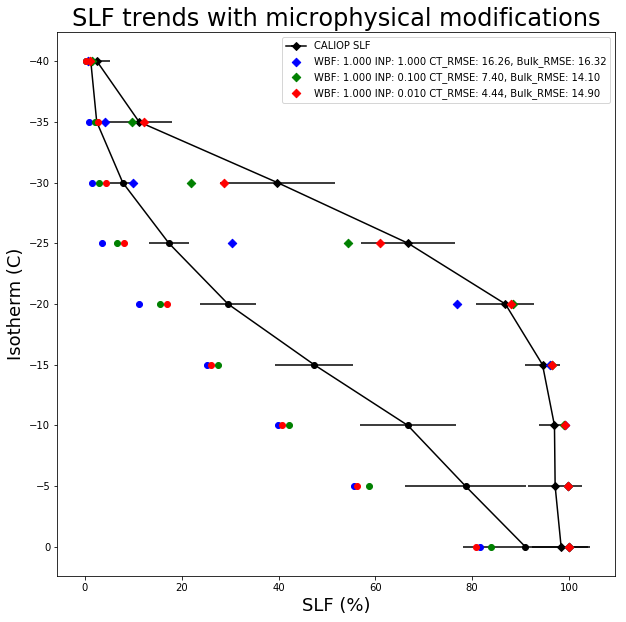

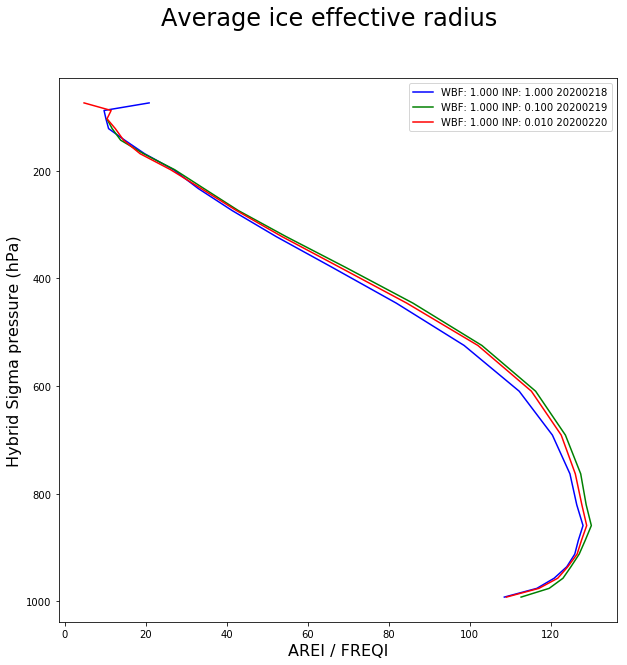

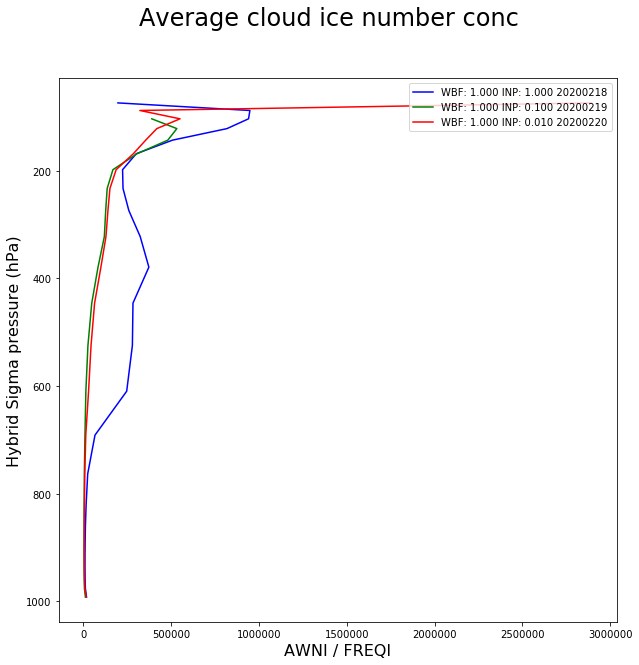

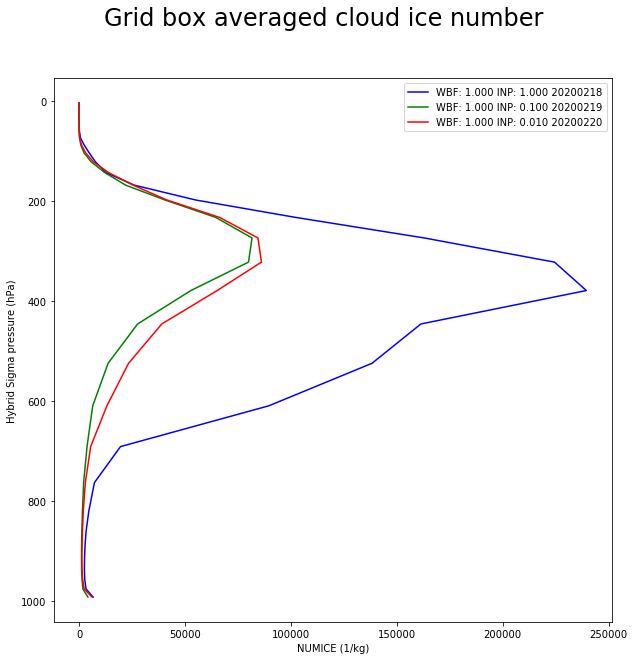

In [57]:
slf_plot = cam61_inp.plot_isos_all()
icesize_plt = cam61_inp.plot_var_ratio('AREI','FREQI')
cloudice_plt = cam61_inp.plot_var_ratio('AWNI','FREQI')
numice_plt = cam61_inp.plot_single_var('NUMICE')

### Takeaway from the first round of INP modifications:
Reducing nucleation from aerosols in mixed-phase clouds increases SLF at cloudtops in a way that seems to be saturating with higher aerosol reductions. 

Ice size is increased only slightly with aerosol reductions. Is this reasonable?

Both in-cloud and grid-averaged ice number concentration are reduced when aerosols are limited, with the effect also seeming to saturate. Why saturation? (other sources come to dominate, perhaps?)

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


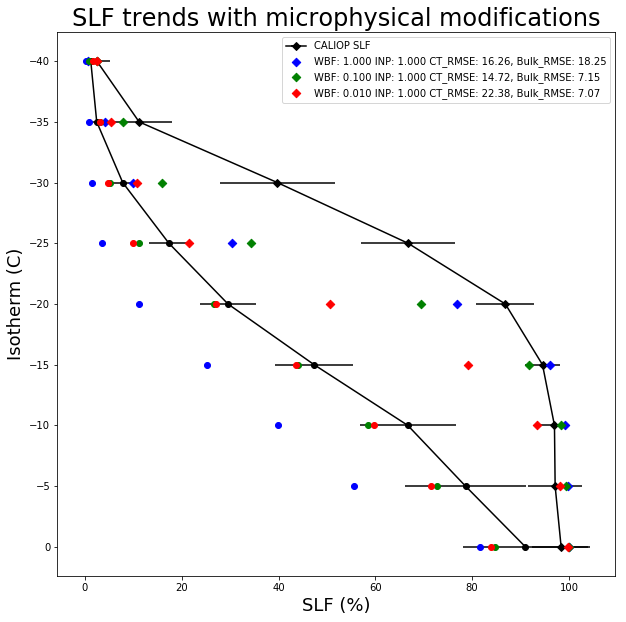

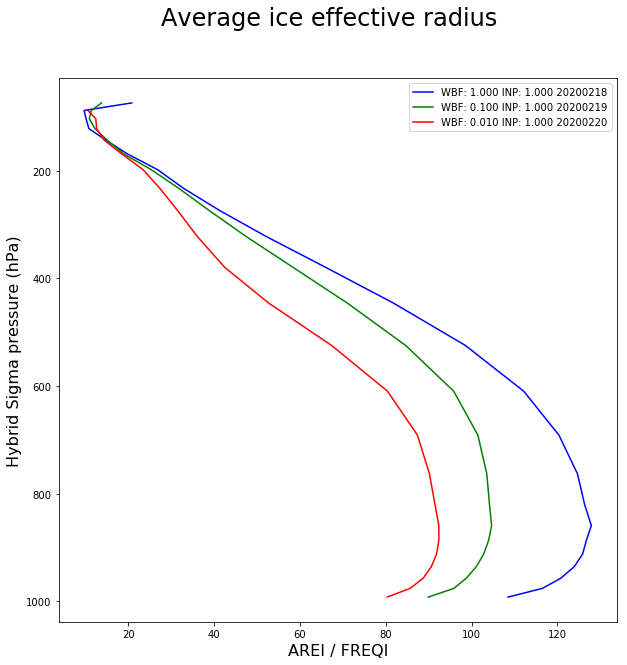

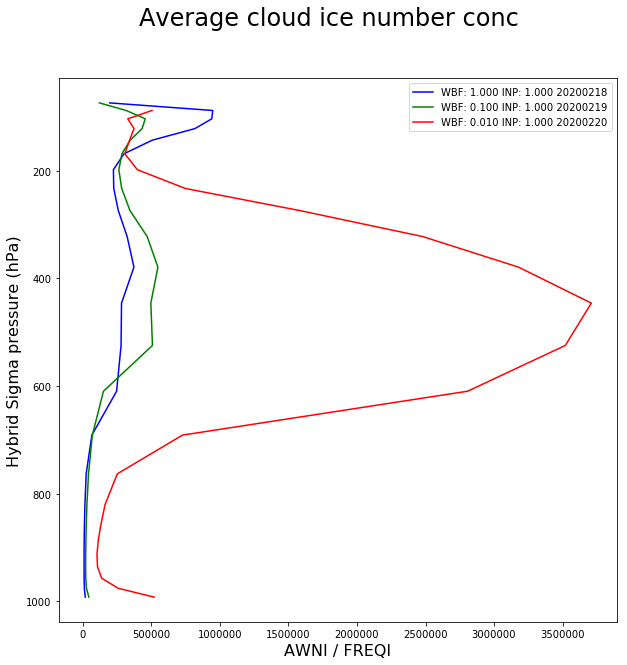

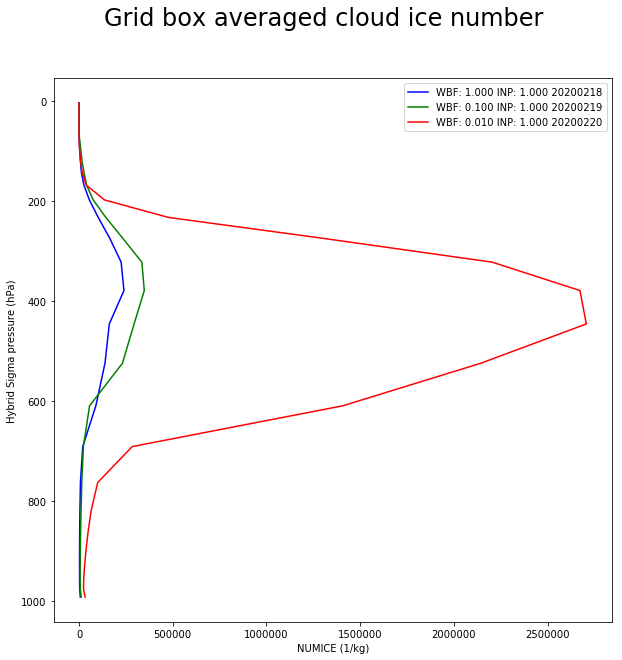

In [54]:
slf_plot = cam61_wbf.plot_isos_all()
icesize_plt = cam61_wbf.plot_var_ratio('AREI','FREQI')
cloudice_plt = cam61_wbf.plot_var_ratio('AWNI','FREQI')
numice_plt = cam61_wbf.plot_single_var('NUMICE')

### Takeaway from the first round of WBF modifications:
Reducing the freezing rate in the WBF process increases SLFs in bulk cloud, and has a saturating effect (1% WBF nearly equivalent to 10% WBF). Cloud-top SLFs are reduced significantly when WBF is reduced to 1%, with the mechanism unclear (???). This is likely due to the massive increase in INP concentration when WBF is reduced to 1%, which offset the reduction in ice from lower freezing rates.

Average ice crystal size decreases significantly with each reduction of WBF. No saturation effect.

In-cloud and grid-averaged ice number concentration increases (exponentially?) with reductions to WBF rate. Why the exponential relation? Are fallout sinks reduced so much that the new equilibrium is so much higher? Is there a divergence point based on average ice size?

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


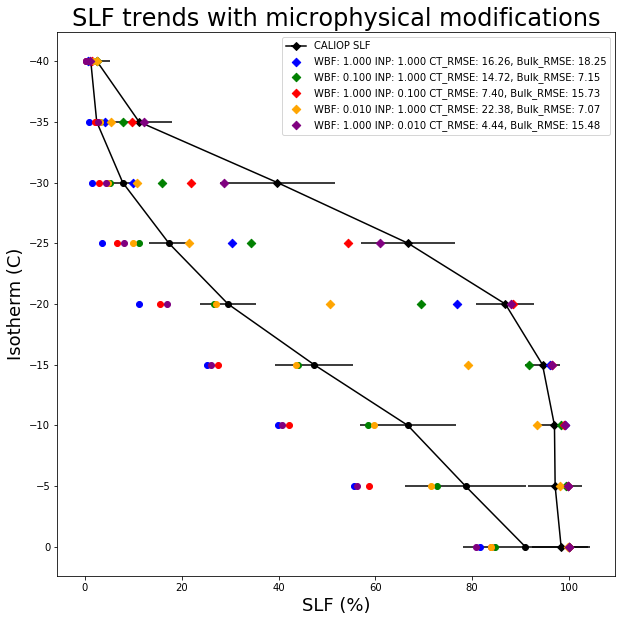

In [45]:
_plt = cam61_comp.plot_isos_all()

## Modify the standard figure object from the class!

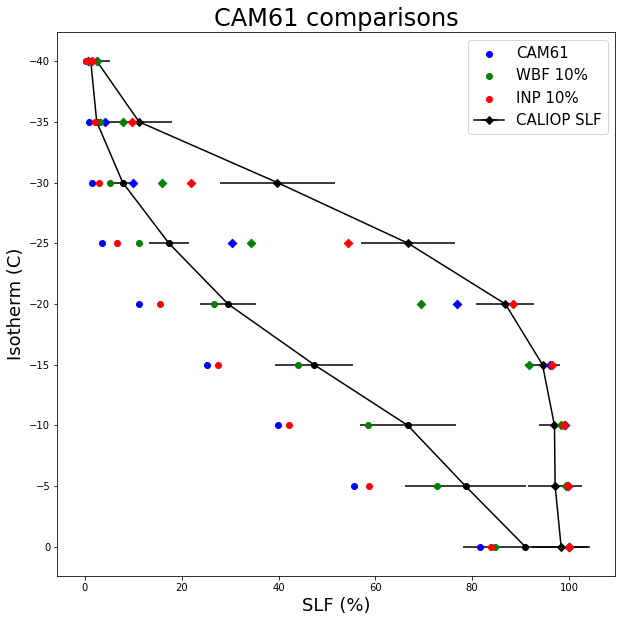

In [35]:
_ax = _plt.get_axes()[0]
_ax.set_title('CAM61 comparisons', fontsize=24)
_handles, _labels = _ax.get_legend_handles_labels()
new_hands = _handles[1::2] # pick every other handle object (since they're paired)
new_labs = ['CAM61', 'WBF 10%','INP 10%', 'CALIOP SLF']
_ax.legend(new_hands, new_labs, fontsize=15)
_plt

In [36]:
filename = '%s/cam6HETice_10xmods.png' % (output_dir)

_plt.savefig(filename,format = 'png', dpi = 200)
_plt.clf()

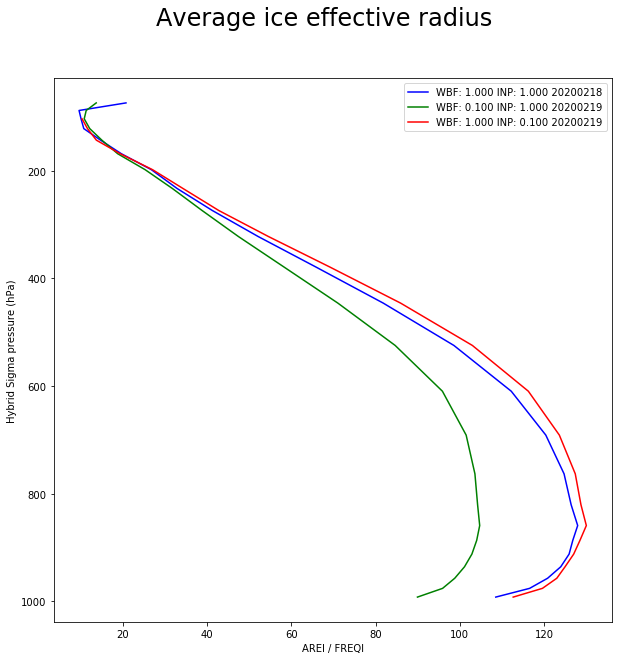

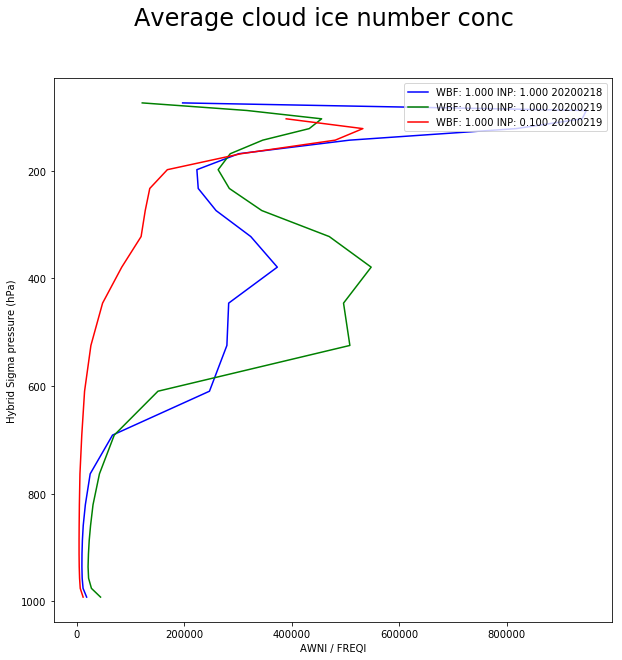

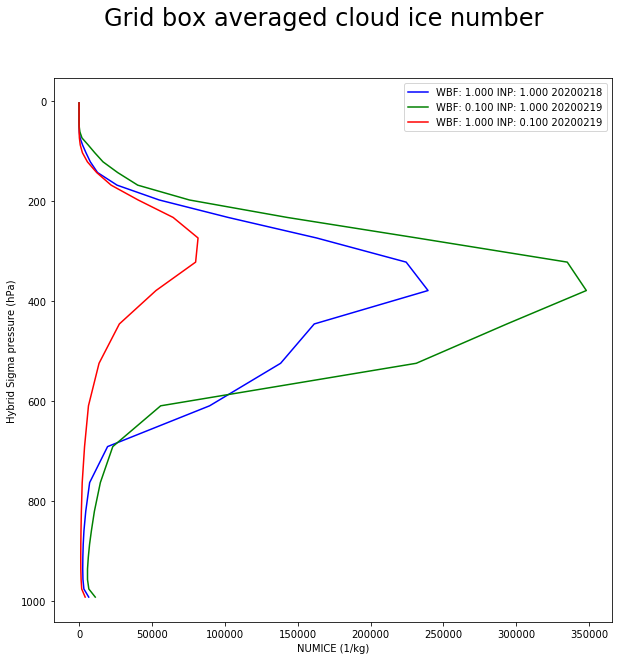

In [53]:
icesize_plt = cam61_comp.plot_var_ratio('AREI','FREQI')
cloudice_plt = cam61_comp.plot_var_ratio('AWNI','FREQI')
numice_plt = cam61_comp.plot_single_var('NUMICE')

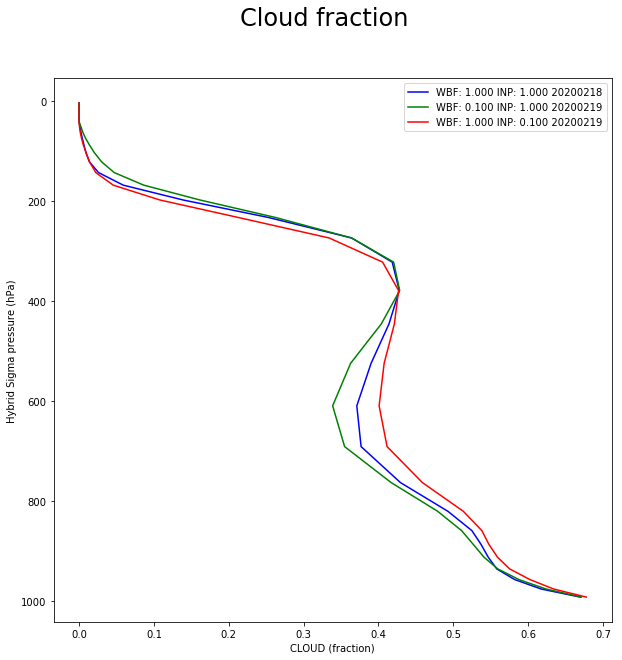

In [ ]:
numice_plt = cam61_comp.plot_single_var('CLOUD')
numice_plt = cam61_comp.plot_single_var('CLDLIQ')
numice_plt = cam61_comp.plot_single_var('CLDICE')

In [24]:
cam61_comp_feb = CT_SLF_Metric(case_dir)

cam6 = '20200109_1541_wbf_1.0_inp_1.0'
cam61 = '20200218_172625_singleparam_cam61_wbf_1_inp_1'

cam61_comp_feb.add_case(cam6)
cam61_comp_feb.add_case(cam61)

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


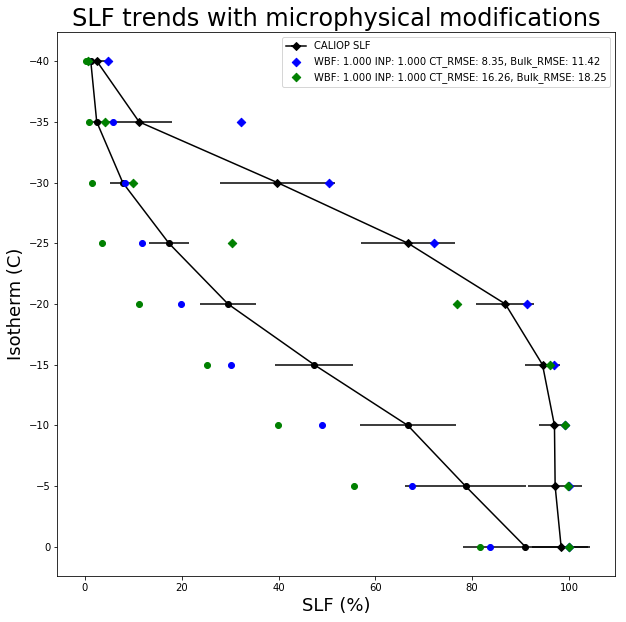

In [27]:
_plt = cam61_comp_feb.plot_isos_all()

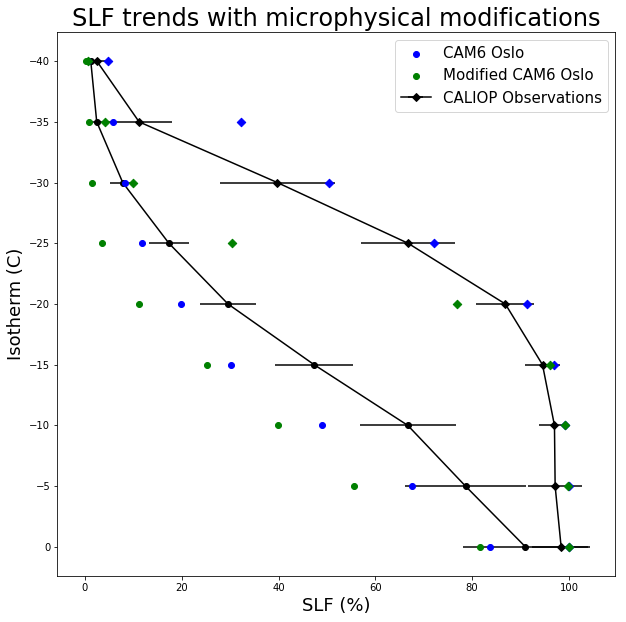

In [30]:
_ax = _plt.get_axes()[0]
#_ax.set_title('Average ice radius by pressure level', fontsize=24)
_handles, _labels = _ax.get_legend_handles_labels()
new_hands = _handles[1::2]
new_labs = ['CAM6 Oslo', 'Modified CAM6 Oslo','CALIOP Observations']
_ax.legend(new_hands, new_labs, fontsize=15)
_plt

In [31]:
filename = '%s/basestate_comparison.png' % (output_dir)

_plt.savefig(filename,format = 'png', dpi = 200)
_plt.clf()

### Create an SLF metric object, and specify the base case model run

In [8]:
origin_metric = CT_SLF_Metric(case_dir, sel_month=2)

base_case = '20200109_1541_wbf_1.0_inp_1.0'
comparison_dir = "inp_validation/"
comparison_runname = "20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_1"

#old100x = '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100'
origin_metric.add_case(base_case)
origin_metric.add_case(comparison_runname, path=comparison_dir)

#single_metric.add_case(old100x)
origin_metric.set_origin(base_case)

mnth15runs/20200109_1541_wbf_1.0_inp_1.0/20200109_1541_wbf_1.0_inp_1.0_slfvars.nc
inp_validation/20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_1/20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_1_slfvars.nc


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


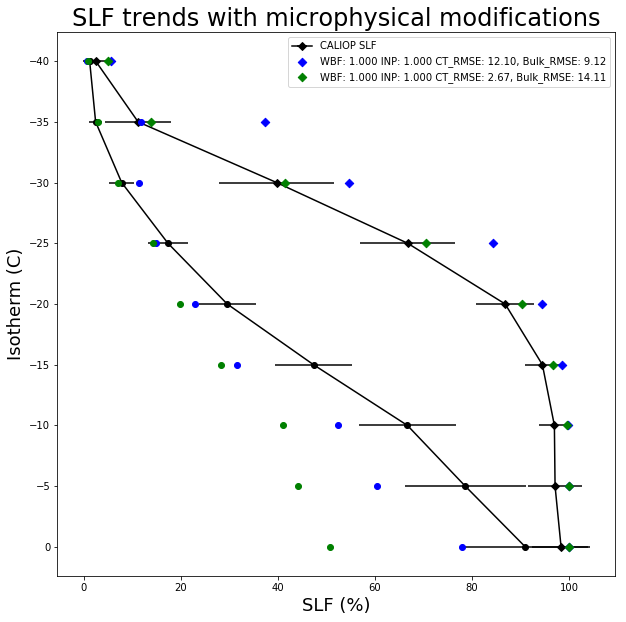

In [9]:
plt1 = origin_metric.plot_isos_all()

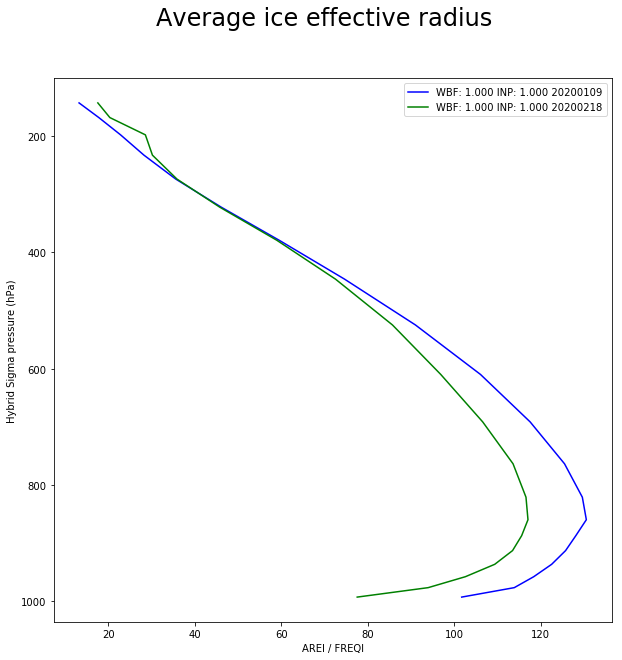

In [10]:
compplot = origin_metric.plot_var_ratio('AREI', 'FREQI')

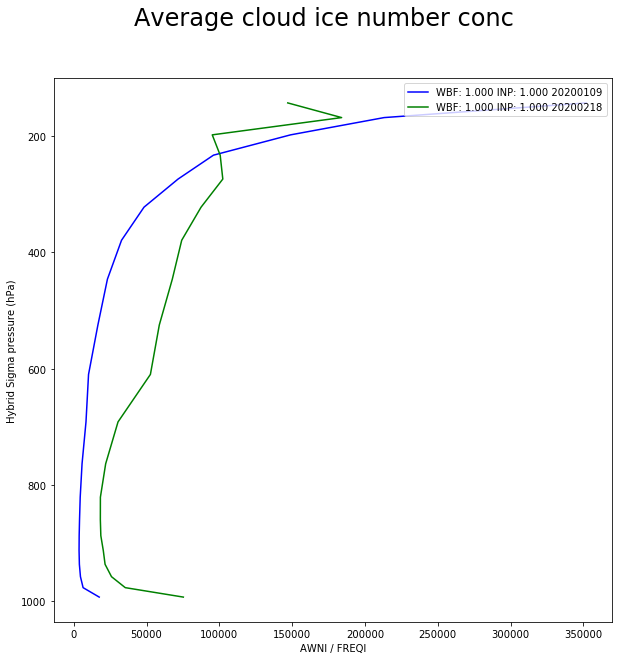

In [11]:
compplot = origin_metric.plot_var_ratio('AWNI', 'FREQI')

In [31]:
filename = '%s/icesize_w_camchange.png' % (output_dir)

compplot.savefig(filename,format = 'png', dpi = 200)
compplot.clf()

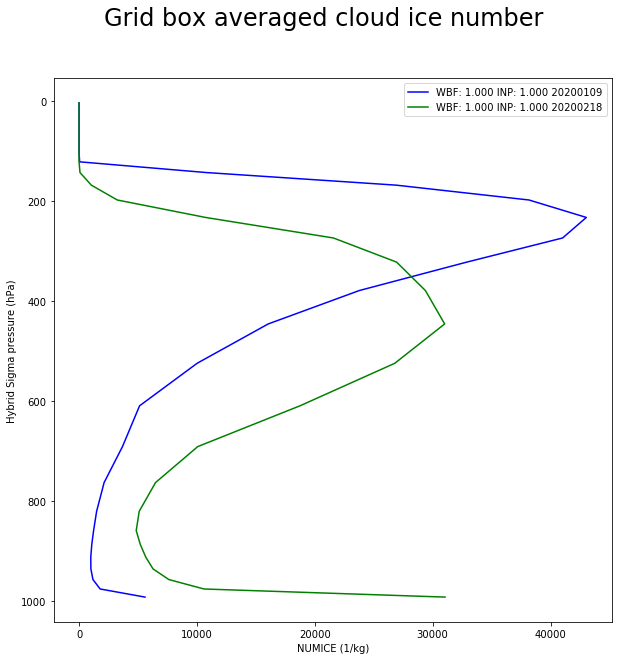

In [29]:
compplot = origin_metric.plot_single_var('NUMICE')

In [26]:
filename = '%s/iceconc_w_camchange.png' % (output_dir)

compplot.savefig(filename,format = 'png', dpi = 200)
compplot.clf()

In [37]:
century_metric = CT_SLF_Metric(case_dir)#, sel_month=2)

base_case = '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100'
comparison_dir = "inp_validation/"
comparison_runname2 = "20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_1"
comparison_runname = "20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_100"

#old100x = '20200128_142303_singleparam_frzrtvarsm15_wbf_1_inp_100'
#century_metric.add_case(base_case)
century_metric.add_case(comparison_runname2, path=comparison_dir)
century_metric.add_case(comparison_runname, path=comparison_dir)

#single_metric.add_case(old100x)
#century_metric.set_origin(base_case)

Loading abridged dataset "slfvars" for 20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_1.
Loading abridged dataset "slfvars" for 20200218_143308_singleparam_nimaxmpconly_wbf_1_inp_100.


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


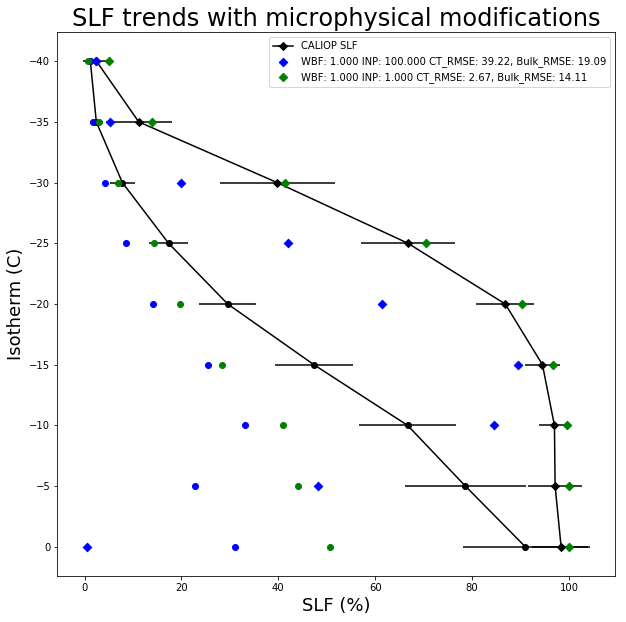

In [34]:
plt2 = century_metric.plot_isos_all()

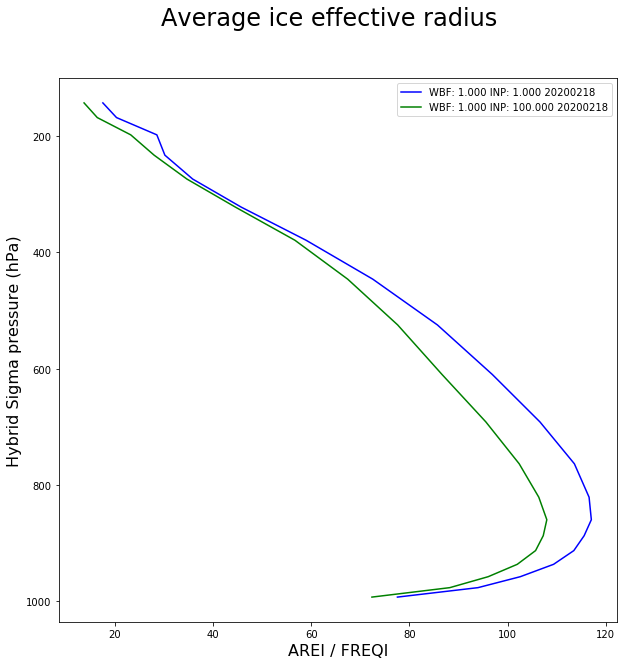

In [41]:
icesize_plot = century_metric.plot_var_ratio('AREI','FREQI')

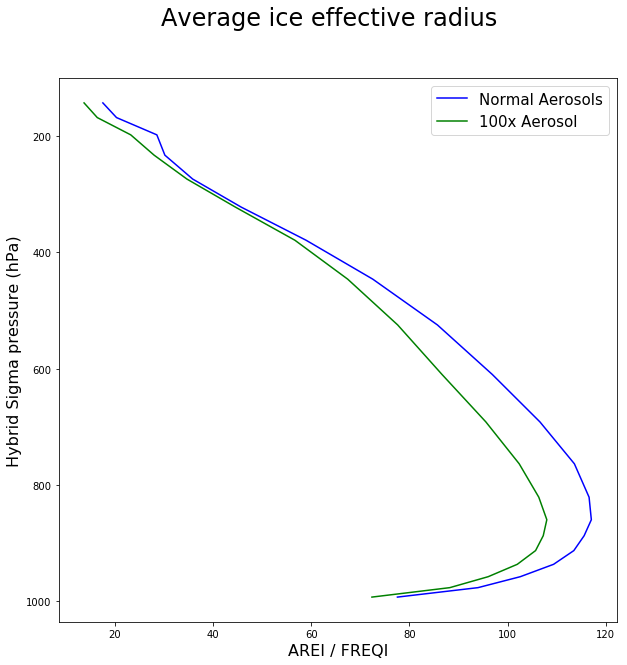

In [42]:
_ax = icesize_plot.get_axes()[0]
#_ax.set_title('Average ice radius by pressure level', fontsize=24)
_handles, _labels = _ax.get_legend_handles_labels()
new_hands = _handles
new_labs = ['Normal Aerosols', '100x Aerosol','CALIOP Observations']
_ax.legend(new_hands, new_labs, fontsize=15)
icesize_plot

In [43]:
filename = '%s/icearad_newCAM.png' % (output_dir)

icesize_plot.savefig(filename,format = 'png', dpi = 200)
icesize_plot.clf()

### Specify comparison here (below)

In [53]:
comparison_dir = "inp_validation/"
comparison_runname = "20200131_120716_singleparam_nimaxmod_wbf_1_inp_100"
comparison_runname2 = "20200131_120822_singleparam_nimaxmod_wbf_1_inp_1"

In [54]:
single_metric.add_case(comparison_runname, path=comparison_dir)
single_metric.add_case(comparison_runname2, path=comparison_dir)

inp_validation/20200131_120716_singleparam_nimaxmod_wbf_1_inp_100/20200131_120716_singleparam_nimaxmod_wbf_1_inp_100_slfvars.nc
inp_validation/20200131_120822_singleparam_nimaxmod_wbf_1_inp_1/20200131_120822_singleparam_nimaxmod_wbf_1_inp_1_slfvars.nc


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
